In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('customer-churn.csv')
df.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#replacing blanks with 0 as tenure is 0 and no total charges are recorded


In [10]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df.isnull().sum().sum()

np.int64(0)

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [16]:
df["customerID"].duplicated().sum()

np.int64(0)

In [ ]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df["SeniorCitizen "].apply(conv)



#Converted 0 and 1 values of senior citizen to yes/no to make it easier to understand.

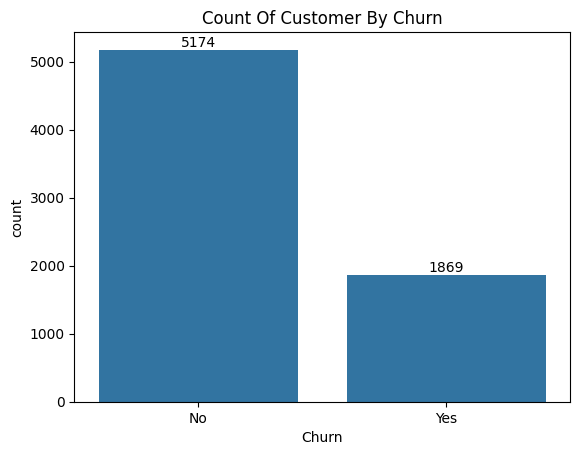

In [46]:
ax = sns.countplot(x = 'Churn', data = df)

ax.bar_label(ax.containers[0])
plt.title("Count Of Customer By Churn")
plt.show()

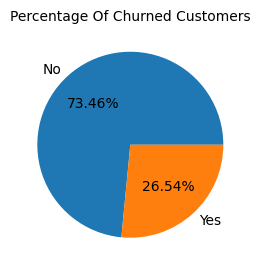

In [47]:
plt.figure(figsize =(3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage Of Churned Customers", fontsize = 10)
plt.show()


#From this given pie chart we can conclude that 26.54% of our customers have churned out.
#Now Let's explore the reason behind it.

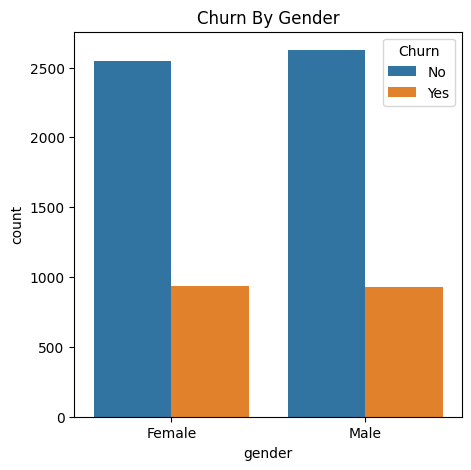

In [54]:
plt.figure(figsize = (5,5))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churn By Gender")
plt.show()


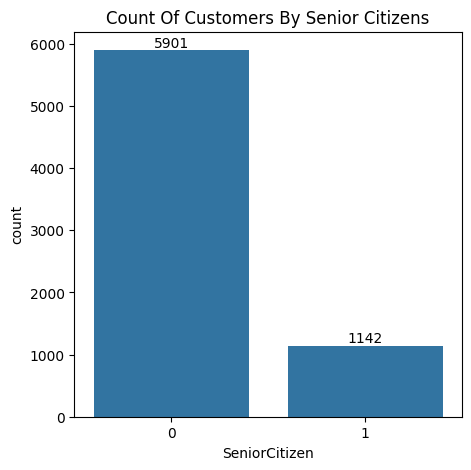

In [66]:
plt.figure(figsize = (5,5))
ax =sns.countplot(x = "SeniorCitizen", data  = df)
ax.bar_label(ax.containers[0])
plt.title("Count Of Customers By Senior Citizens")
plt.show()


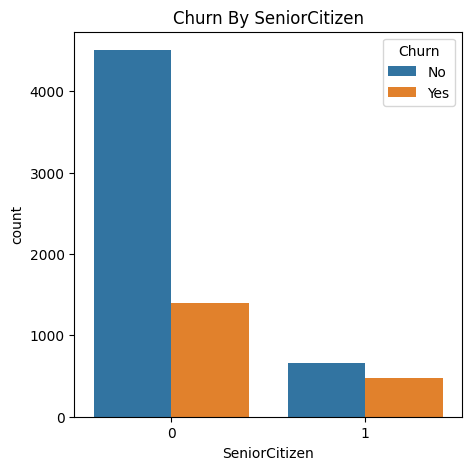

In [57]:
plt.figure(figsize = (5,5))
sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn")
plt.title("Churn By SeniorCitizen")
plt.show()

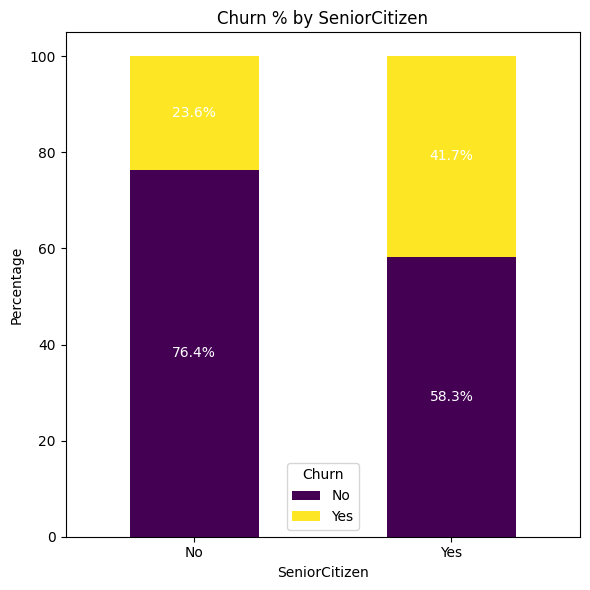

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create a crosstab of counts
count_data = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Step 2: Convert to percentages
percent_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Step 3: Plot stacked bar chart
ax = percent_data.plot(kind='bar', stacked=True, figsize=(6, 6), colormap='viridis')

# Add labels
for i, (index, row) in enumerate(percent_data.iterrows()):
    bottom = 0
    for col in percent_data.columns:
        height = row[col]
        if height > 5:  # Avoid clutter for very small labels
            ax.text(i, bottom + height / 2, f"{height:.1f}%", ha='center', va='center', color='white', fontsize=10)
        bottom += height

# Axis labels and title
plt.title('Churn % by SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.legend(title='Churn', loc='best')
plt.tight_layout()
plt.show()

#Comparative a greater percentage of senior citizens have churned out.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

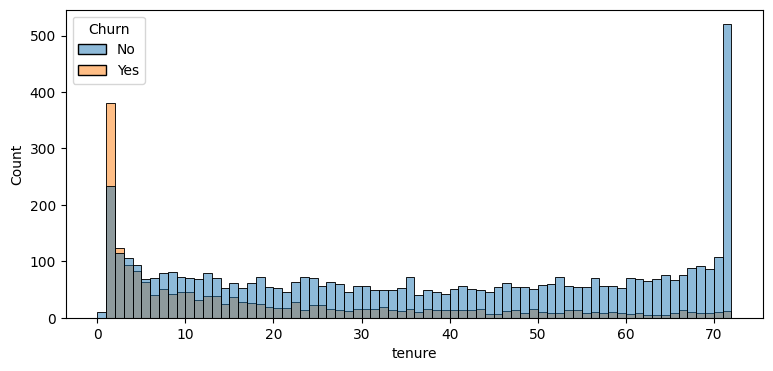

In [23]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()           

#People who have used our services for a long time have stayed and people who have used our services for 1 or 2 months have churned out.

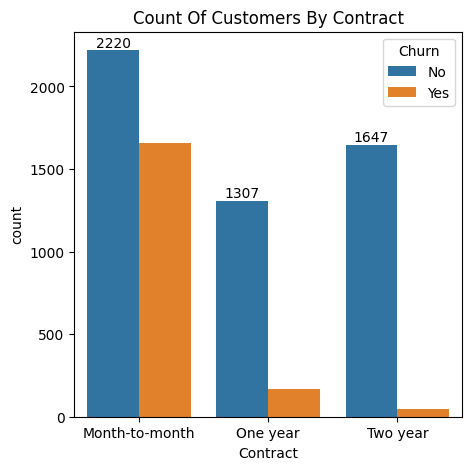

In [25]:
plt.figure(figsize = (5,5))
ax =sns.countplot(x = "Contract", data  = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count Of Customers By Contract")
plt.show()


#People who have month to month contract are likely to chuen the from those whohave 1 or 2 years of contract. 

In [26]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

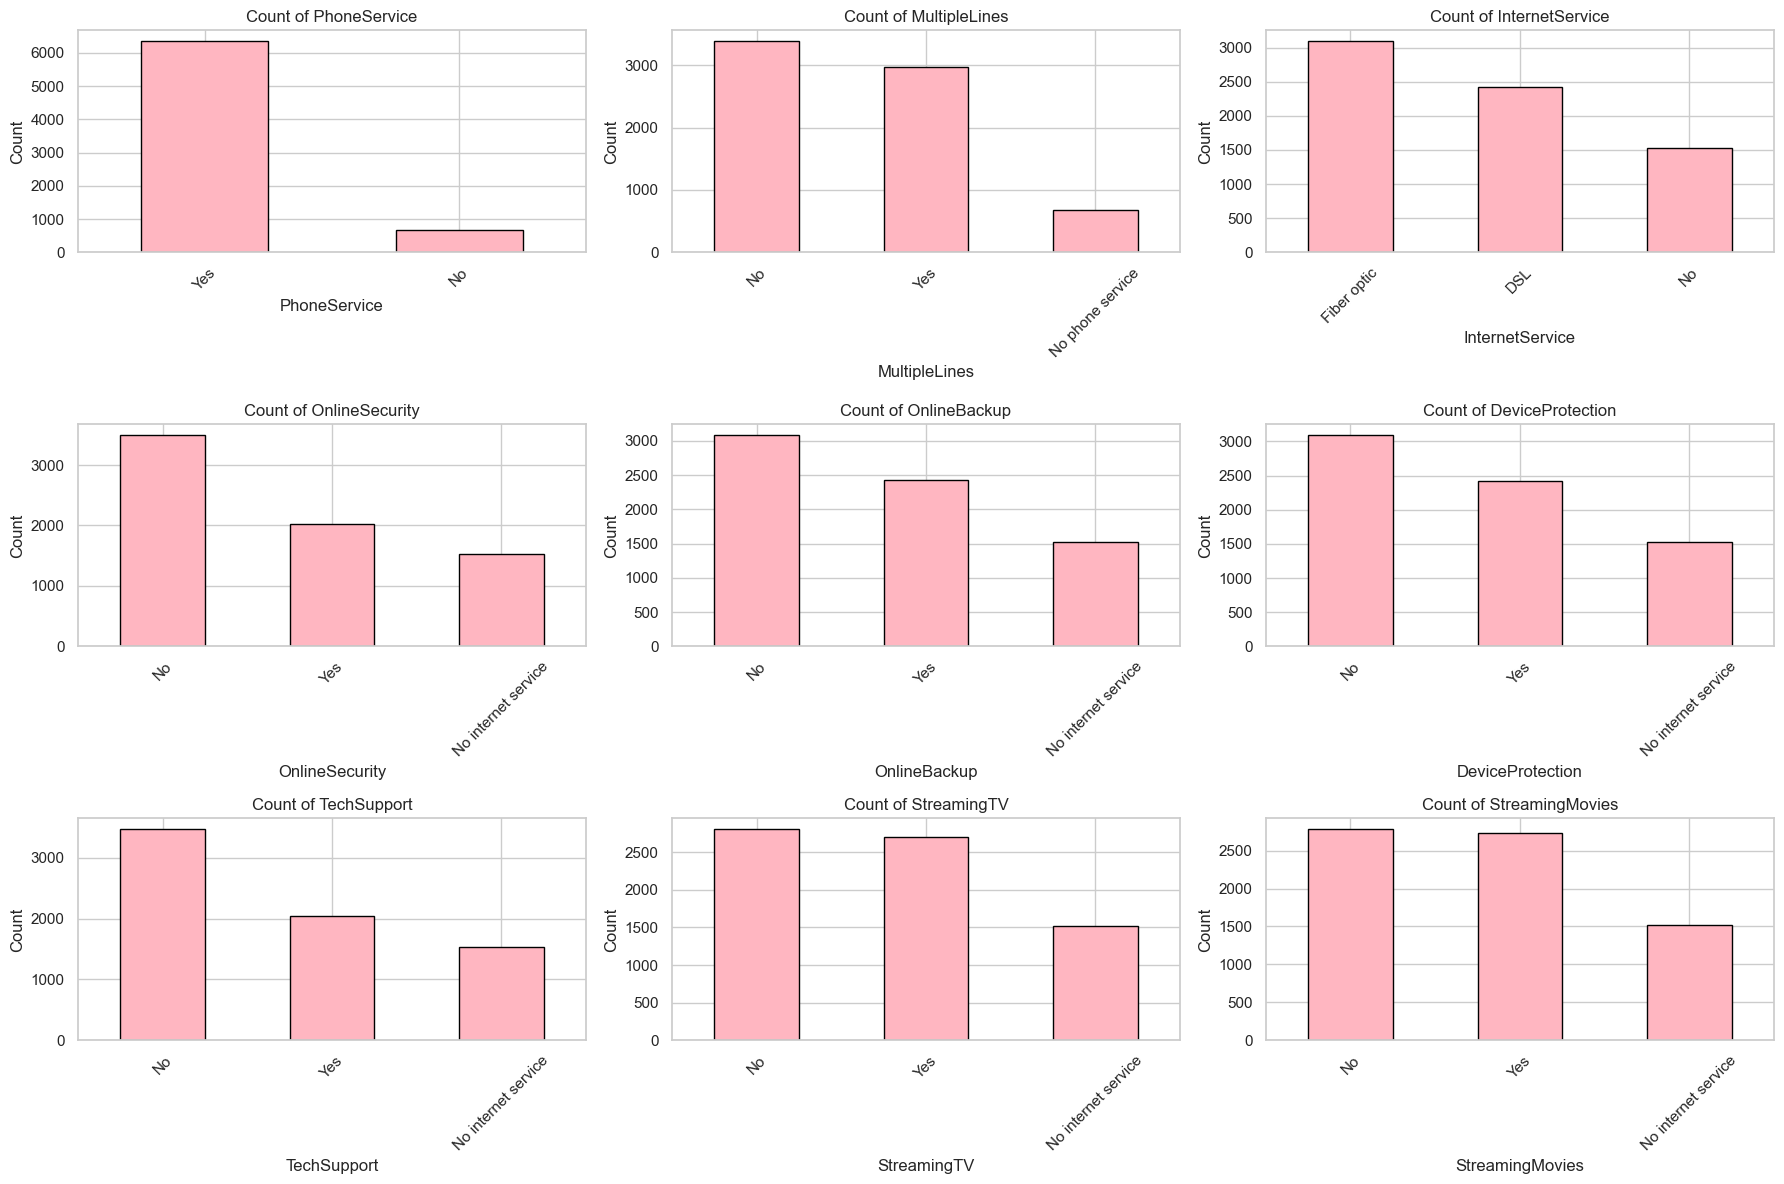

In [37]:
# List of columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Setup subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()

# Loop through each column and use pandas plot
for idx, column in enumerate(columns):
    
    df[column].value_counts().plot(kind='bar', ax=axes[idx], color='lightpink', edgecolor='black')
    axes[idx].set_title(f'Count of {column}')
    axes[idx].set_ylabel('Count')
    axes[idx].set_xlabel(column)
    axes[idx].tick_params(axis='x', rotation=45)

# Remove any extra axes
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#The count plots reveal that most customers have core services like PhoneService and Fiber optic internet, but adoption of optional features such as OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport is relatively low. In contrast, StreamingTV and StreamingMovies show more balanced usage, likely due to their clear value. A notable portion of customers lack internet service, which limits access to many add-ons. Overall, while essential services are widely used, there is significant opportunity to increase engagement with optional features through better marketing, bundling, or education.

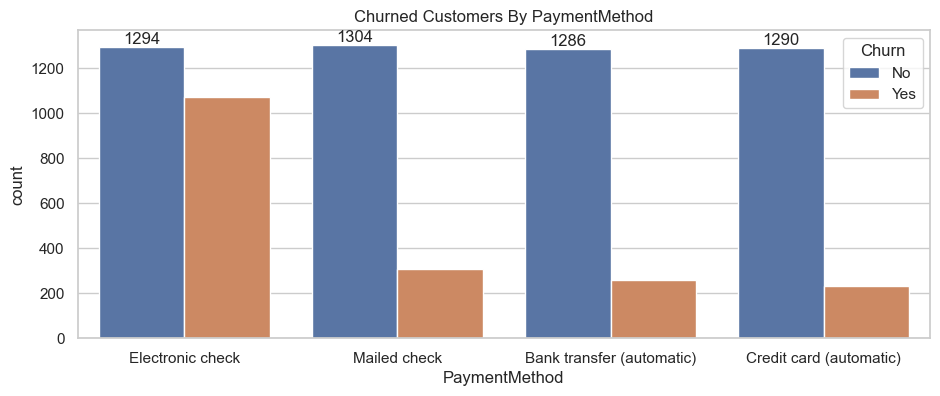

In [47]:
plt.figure(figsize = (11,4))
ax =sns.countplot(x = "PaymentMethod", data  = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Churned Customers By PaymentMethod")
plt.show()

#Customer is likely to churn when he is using electronic check as a payment method.